# Lab 5
* **Name**: Utkarsh Prakash

## Title
Demostrate the working principle of two layer hetero-associative network.

## Objective
* To observe and understand different methods of finding optimal weights in a pattern association task.
* To overcome the limitation of number of patterns to input dimensionality by converting the task to pattern classification task.

## Hypothesis:
* In a hetero-association task the number of patterns that can be learnt is limited by the input dimension i.e number of training examples ($L$) should be less than or equal to input vector dimension ($M$).
* By converting the task to a pattern classification task, we should be able to overcome this limitation.

## Experimental Description:
1. **Data Generation:** <br />
We generate synthetic data for training and testing. <br/><br />
2. **Network:** <br /><br />
![Linear Hetero-Associative Feedforward Network](tmp/IMG_4674.jpg) <br /><br />
3. **Operations:** <br />
Let $A$ be a $M\times L$ matrix of input vectors (training examples) where each column represents a training examples. Let $B$ be a $N \times L$ matrix of desired output vectors where each column represents the desired output for the corresponding training example in the matrix $A$. Let $B'$ denote the output obtained from the neuron. Let $W$ be the weight matrix such that $B' = WA$. <br />
The error between the desired output vectors $(B)$ and the actual output vectors $(B')$ is given as follows:<br />
<center> $E = \frac{1}{L} ||B - B'||_{2}$ </center> <br />

     **Weights by Computation:**<br />
Now, it can be shown that the minimum error E can be obtained when $W = BA^+$ where $A^+$ presents the Moore-Penrose pseudo inverse of the matrix A. <br /><br />

      **Weights by Widrow's Learning Law:**<br />
Using, the notations defined earlier, the weight update equation for Widrow's Learning Law is given by: <br />
<center>$w_{ji}(l) = w_{ji}(l-1) + \eta(b_{lj} - w_{j}^T(l-1)a_l)a_{li}$ </center> <br />
where $\eta$ is a small positive constant called the learning rate parameter. <br/>
In matrix form, the update equation for the $l^{th}$ pattern pair $(a_l, b_l)$ is given by: <br />
<center> $W(l) = W(l-1) + \eta(b_l - W(l-1)a_l)a_l^T$ </center> <br /> <br />

    Now to overcome the limitation of input dimension vs number of training examples, we convert the hetero-association task to pattern classification task. <br /><br />

    **Pattern Classification Task- Perceptron Learning Law:**<br />
Let the index $m$ denote the learning process at the $m^{th}$ step. Let vectors $a$ and $w(m)$ be the input and weight vectors, respectively, at the mth step. $\eta$ is a positive learning rate parameter. The perceptron learning law can be stated as follows: 
<center> $w(m+1) = w(m) + \eta e(m)a(m)$ </center>
where $e(m) = b(m) - s(m)$, $b(m)$ is the desired output and $s(m)$ is the actual output for the input vector $a(m)$ to the perceptron. <br />
The non-linear function used in the output layer of the perceptron is defined as follows:
<center> $f(x) = 1, x > 0$ <br />
        $f(x) = 0, x <= 0$ </center> <br /><br />
        
4. **Training:** <br />
For weights by learning, we randomly present one training example to the network. <br /> <br />
5. **Testing:** <br />
For testing, the error between the desired output vectors $(B)$ and the actual output vectors $(B')$ is given as follows:<br />
<center> $E = \frac{1}{L} ||B - B'||_{2}$ </center> <br />

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generating data where number of training examples = input dimension
A = np.array([[1, 1, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 1]])

B = np.array([[1, 1, 0, 0],
             [0, 0, 1, 1]])

In [4]:
# Generating data where number of training examples > input dimension
A_prime = np.array([[1, 1, 0, 0, 0],
                    [0, 1, 0, 0, 1,],
                     [0, 0, 0, 1, 0],
                     [0, 0, 1, 1, 0]])

B_prime = np.array([[1, 1, 0, 0, 1],
                     [0, 0, 1, 1, 0]])

In [11]:
A_test = A + np.random.normal(scale=0.01, size=A.shape)     # Input vector with noise
A_test

array([[ 9.91193709e-01,  9.83963791e-01,  8.61256907e-03,
         3.13898201e-04],
       [ 5.01639583e-03,  9.77150281e-01,  1.12711808e-02,
        -1.30059010e-02],
       [-1.73379187e-02, -8.56834497e-04, -7.11675737e-03,
         1.01118852e+00],
       [ 5.71769152e-03, -1.42210598e-02,  1.00303665e+00,
         1.00322613e+00]])

In [5]:
def MeanSquaredError(w, A, B, norm=False):
    '''
        This function calculates the mean squared error
        between the actual output vectors and desired 
        output vectors.
    '''
    # Normalize the input vectors if norm = True
    if norm:
        A = (A - np.mean(A, axis=1, keepdims=True))/np.std(A, axis=1, keepdims=True)
    
    b_pred = np.dot(w, A)          # output value
    
    return np.linalg.norm(b_pred - B)**2/A.shape[1]     # Calculate LMS error

### Weights By Computation

In [6]:
def weights_by_computation(A, B):
    '''
        This function finds the optimal weights of the network
        using computation method (Linear Algebra method).
    '''

    return np.dot(B, np.linalg.pinv(A))

#### Case 1: Number of training examples <= input dimension

In [7]:
w = weights_by_computation(A, B)                        # Weight calculation
print("Error:", MeanSquaredError(w, A, B))              # Error calculation

Error: 8.320017359752859e-32


In [8]:
b_pred = np.dot(w, A)                # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred)

print("Actual Output")
print("-------------")
print(B)

Predicted Output
---------------
[[1. 1. 0. 0.]
 [0. 0. 1. 1.]]
Actual Output
-------------
[[1 1 0 0]
 [0 0 1 1]]


##### Testing

In [12]:
b_pred_test = np.dot(w, A_test)                # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred_test)

Predicted Output
---------------
[[ 9.91193709e-01  9.83963791e-01  8.61256907e-03  3.13898201e-04]
 [ 5.71769152e-03 -1.42210598e-02  1.00303665e+00  1.00322613e+00]]


#### Case 2: Number of training examples > input dimension

In [13]:
w = weights_by_computation(A_prime, B_prime)                        # Weight calculation
print("Error:", MeanSquaredError(w, A_prime, B_prime))              # Error calculation

Error: 0.06666666666666668


In [14]:
b_pred_prime = np.dot(w, A_prime)      # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred_prime)

print("Actual Output")
print("-------------")
print(B_prime)

Predicted Output
---------------
[[0.66666667 1.33333333 0.         0.         0.66666667]
 [0.         0.         1.         1.         0.        ]]
Actual Output
-------------
[[1 1 0 0 1]
 [0 0 1 1 0]]


### Widrow-Hoff Learning Law

In [15]:
def WidrowLearning(A, B, epochs=1000, learning_rate=0.01):
    '''
        This function calculates the optimal weights using
        the Widrow-Hoff learning law.
    '''
    w = np.zeros((B.shape[0], A.shape[0]))       # Weight initialisation
    
    errors = []
    
    # Running for different epochs
    for i in range(epochs):
        # Randomly shuffle the training examples
        permutation = np.random.permutation(A.shape[1])
        A = A[:, permutation]
        B = B[:, permutation]
        
        # Present one training example
        for l in range(A.shape[1]):
            al = np.expand_dims(A[:, l], axis=-1)
            bl = np.expand_dims(B[:, l], axis=-1)
            w = w + learning_rate*np.dot((bl - np.dot(w, al)), al.T)    # Weight update
            
            error = MeanSquaredError(w, A, B)      # Error calculation
            errors.append(error)
        
        # Early stopping
        if error <= 10**(-20):
            break
    
    return w, errors

#### Case 1: Number of training examples <= input dimension

In [16]:
w, errors = WidrowLearning(A, B)                        # Weight calculation
print("Error:", MeanSquaredError(w, A, B))              # Error calculation

Error: 2.425309628737457e-05


In [17]:
b_pred = np.dot(w, A)               # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred)

print("Actual Output")
print("-------------")
print(B)

Predicted Output
---------------
[[0.99406594 1.0036411  0.         0.        ]
 [0.         0.         0.99406575 1.00365052]]
Actual Output
-------------
[[1 1 0 0]
 [0 0 1 1]]


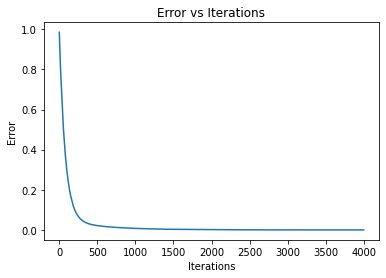

In [18]:
plt.figure()               # Predicted B
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error vs Iterations")
plt.show()

##### Testing

In [19]:
b_pred_test = np.dot(w, A_test)                # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred_test)

Predicted Output
---------------
[[ 9.85359936e-01  9.87481260e-01  8.66938492e-03  1.87501921e-04]
 [ 5.51758119e-03 -1.41448810e-02  9.97016161e-01  1.00696475e+00]]


#### Case 2: Number of training examples > input dimension

In [20]:
w, errors = WidrowLearning(A_prime, B_prime)                        # Weight calculation
print("Error:", MeanSquaredError(w, A_prime, B_prime))              # Error calculation

Error: 0.06667638693283948


In [21]:
b_pred_prime = np.dot(w, A_prime)         # Predicted B

print("Predicted Output")
print("---------------")
print(b_pred_prime)

print("Actual Output")
print("-------------")
print(B_prime)

Predicted Output
---------------
[[0.66652762 1.33308706 0.         0.         0.66655944]
 [0.         0.         0.99406546 1.00364569 0.        ]]
Actual Output
-------------
[[1 1 0 0 1]
 [0 0 1 1 0]]


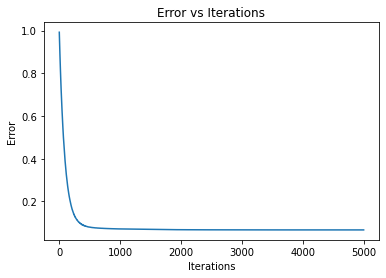

In [22]:
plt.figure()
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error vs Iterations")
plt.show()

### Conversion to Pattern Classification Task

The output vector in the above hetero-association task was 2-dimensional and each dimension had a binary value i.e. (0 or 1). Hence, we can convert it to a pattern classification task with 2 neurons in the output layer. <br/>
![Perceptron Model](tmp/IMG_4661.jpg) <br /><br />

In [23]:
def MissClassificationError(X, y, w):
    '''
        This function calculates the fraction of examples
        misclassified by the perceptron.
    '''
    activation = np.dot(X, w)             # activation value
    y_pred = np.where(activation > 0, 1, 0) # output value
    
    return np.sum((y != y_pred).any(axis=1), axis=0)/X.shape[0]   # error calculation

In [24]:
def PerceptronLearningBatch(X, y, learning_rate=0.01, epochs=1000):
    '''
        This function implements the Perceptron Learning Law using
        Batch update.
    '''
    errors = []          # List for storing errors

    w=np.random.uniform(0,1,(X.shape[1],y.shape[1]))   # Weight initialisation
    
    for i in range(epochs):
        activation = np.dot(X, w)                # activation value
        output = np.where(activation > 0, 1, 0)  # output value

        error = y - output                 # error

        gradient = (learning_rate*np.dot(X.T, error))/(2*X.shape[0])     # gradient calculation

        w = w + gradient                  # weight update
        
        # Error calculation 
        error = MissClassificationError(X, y, w)
        errors.append(MissClassificationError(X, y, w))
        
        # Early stopping
        if np.linalg.norm(gradient)<= 10**(-10):
            break
            
    return w, errors

In [25]:
w, errors = PerceptronLearningBatch(A_prime.T, B_prime.T, learning_rate=0.01, epochs=1000)  # Learning weights

In [26]:
activation = np.dot(A_prime.T, w)                # activation value
output = np.where(activation > 0, 1, 0)          # output value

print("Predicted Output")
print("---------------")
print(output.T)

print("Actual Output")
print("-------------")
print(B_prime)

Predicted Output
---------------
[[1 1 0 0 1]
 [0 0 1 1 0]]
Actual Output
-------------
[[1 1 0 0 1]
 [0 0 1 1 0]]


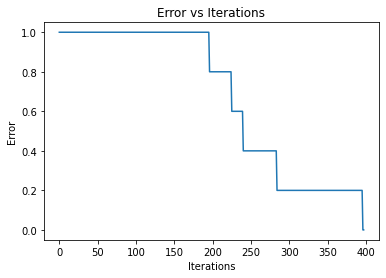

In [27]:
plt.figure()
plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error vs Iterations")
plt.show()

## Observations
Let input vector dimension be $m$ and the number of training examples be $l$. <br />

| Input Vectors | Algorithm/Method | Error |
| --- | --- | --- |
| l = m | Weights by Computation | 8.32e-32 |
| | Widrow-Hoff Learning Law | 2.42e-05 |
| l > m | Weights by Computation | 0.06 |
| | Widrow-Hoff Learning Law | 0.06 |
| | Perceptron Learning Law | 0.0 |

## Conclusion
* For a hetero-association task, the number of training examples that can perfectly recalled by the network is limited by the dimension of input vectors.
* We can overcome this limitation by converting the hetero-association task to a pattern classification task by using a hard-limiting output function (Perceptron Model).
* The weights by computation and Widrow-Hoff learning Law show interpolative behaviour.
* The error in case of Widrow-Hoff learning is greater than weights by computation because Widrow-Hoff learning is an approximate method for calculating the optimal weights.

## References
1. Artificial Neural Networks, B. Yegnanaryana, 1999